In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import copy
from deonticAgent import deonticAgent
from networkFunctions import *

In [29]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 20
numMsg = 200
myseed = 32
maxEpochs = 10000

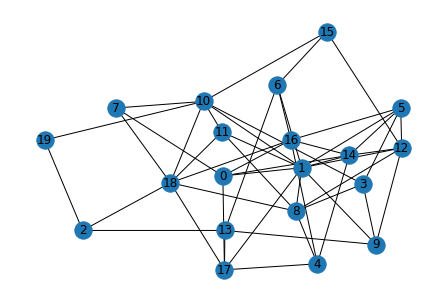

In [30]:
G = nx.erdos_renyi_graph(numNodes, 0.2, seed=myseed)
myPos = nx.spring_layout(G, seed = 40)
nx.draw(G, pos=myPos, with_labels=True)

In [52]:
#graph initialization
common_attrs = {"burnoutThreshold":2*(numMsg*costFactor*msgUtility)/numNodes,"burnoutDrop":2}
def initGraph(G):

    nodeAttr = {}
    for i in range(numNodes):
        temp = {}
        temp['agent'] = deonticAgent(common_attrs)
        nodeAttr[i] = temp
    nx.set_node_attributes(G, nodeAttr)

    for n in G.nodes():
        neigList = list(G.neighbors(n))
        agent = G.nodes[n]['agent']
        agent.initNeig(neigList)

In [53]:
e = 0
prevStates = []
maxEpochs = 1
initGraph(G)
while e<maxEpochs:
    e+=1
    print(getNetworkProp(G, "forwardProb"))
    msgList = createMsgs(numMsg, numNodes, G)  #Message list creation
    prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(numNodes)]
    # print(getNetworkProp(G, "forwardProb"))
    nf, nd = transmitMsgs(msgList, G)
    print(nf, nd)
    curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(numNodes)]
    if np.count_nonzero(curStable) == numNodes:
        break
print(e)

[0.9595243725070219, 0.9916955725104986, 0.5871275236411084, 0.9998391417215544, 0.5423077744197435, 0.878657417840804, 0.5466527594266811, 0.679475026528392, 0.8948709441351401, 0.8393275239968747, 0.5992656572276058, 0.5145406626610141, 0.6771627050568589, 0.8016685687129189, 0.6588355330718889, 0.8001780913118983, 0.9573751463505258, 0.8052669753823654, 0.60394712625976, 0.6523497443617579]
141 59
1


In [54]:
print(G.nodes[0]['agent'].burnoutCount)
print(G.nodes[0]['agent'].burnoutThreshold)

0
20.0


In [55]:
print(getNetworkProp(G, "cost"))

[13.0, 27.0, 18.0, 20.0, 17.0, 18.0, 15.0, 11.0, 17.0, 16.0, 28.0, 8.0, 18.0, 18.0, 13.0, 11.0, 17.0, 21.0, 20.0, 15.0]


In [56]:
print(getNetworkProp(G, "forwardProb"))

[0.9595243725070219, 0.8548809432110142, 0.5561981549413711, 0.9998391417215544, 0.5423077744197435, 0.8623109545756431, 0.5466527594266811, 0.679475026528392, 0.8605727374767363, 0.8517643853465595, 0.6904571069873355, 0.5145406626610141, 0.6989061574409956, 0.8016685687129189, 0.6588355330718889, 0.8001780913118983, 0.8931102321802896, 0.8153033144364075, 0.5716164302878739, 0.6523497443617579]


In [57]:
print(getNetworkProp(G, "burnout"))

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]


In [58]:
print(np.sum(getNetworkProp(G, "utility")))

820
